### Finding a Most Likely Common Ancestor 

In [Counting Point Mutations](https://github.com/halimv/caramel-latte/blob/main/Rosalind/HAMM.ipynb), we calculated the minimum number of symbol mismatches between two strings of equal length to model the problem of finding the minimum number of point mutations occuring on the evolutionary path between two homologous strands of DNA. 

If we instead have *several* homologous strands that we wish to analyze simultaneously, then the natural problem is to find an average-case strand to represent the most likely common ancestor of the given strands. 

### Problem 
Given an $m \times n$ matrix $A$, $A_{i,j}$ is the intersection of row $i$ and column $j$. 

For a collection of DNA strings all of length $n$, the **profile matrix** of the collection is a $4 \times n$ matrix. Each row is a base, and the columns show how many times that base occurs in column $n$.

A consensus string $c$ is a string of length $n$ formed by taking the most common symbol of the profile matrix. There may be more than one most common symbol, leading to multiple consensus strings


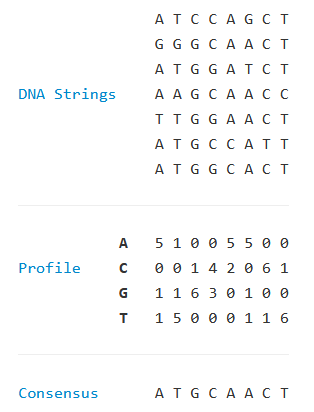

### Given
A collection of at most 10 DNA strings of equal length (at most 1 kbp) in FASTA format. 

### Return 
A consensus string and profile matrix for the collection. If several possible consensus strings exist, then you may return any one of them


### Sample Dataset 
```
>Rosalind_1
ATCCAGCT
>Rosalind_2
GGGCAACT
>Rosalind_3
ATGGATCT
>Rosalind_4
AAGCAACC
>Rosalind_5
TTGGAACT
>Rosalind_6
ATGCCATT
>Rosalind_7
ATGGCACT
```

### Sample Output 
```
ATGCAACT
A: 5 1 0 0 5 5 0 0
C: 0 0 1 4 2 0 6 1
G: 1 1 6 3 0 1 0 0
T: 1 5 0 0 0 1 1 6
```


### Solution using sample dataset from Rosalind

In [1]:
from Bio import SeqIO
import pandas as pd

# returns SeqRecord object
for records in SeqIO.parse("datasets/rosalind_cons_sample.txt","fasta"):
    print(records.seq)

ATCCAGCT
GGGCAACT
ATGGATCT
AAGCAACC
TTGGAACT
ATGCCATT
ATGGCACT


In [2]:

# loop through seqs, assign each string as a column in df 
# strings are added as **columns** not rows as represented in Rosalind image 

# convert seqs to string, pandas is optimized for strings

fh = "datasets/rosalind_cons_sample.txt"
seqs = [str(records.seq) for records in SeqIO.parse(fh,"fasta")]

# create profile matrix dataframe, strings as rows 
string_length = len(seqs[0])
dna_strings_df = pd.DataFrame([list(string) for string in seqs])

# rename rows and columns for clarity 
dna_strings_df.columns = [f"pos{i}" for i in range(len(dna_strings_df.columns))]
dna_strings_df.index = [f"str{i}" for i in range(len(dna_strings_df))]

dna_strings_df


,pos0,pos1,pos2,pos3,pos4,pos5,pos6,pos7
str0,A,T,C,C,A,G,C,T
str1,G,G,G,C,A,A,C,T
str2,A,T,G,G,A,T,C,T
str3,A,A,G,C,A,A,C,C
str4,T,T,G,G,A,A,C,T
str5,A,T,G,C,C,A,T,T
str6,A,T,G,G,C,A,C,T


In [3]:
# create a profile matrix claculating the sums
bases = ['A','C','G','T'] 
prof_matrix_df = pd.DataFrame(0,columns = dna_strings_df.columns, index = bases)

for base in bases: 
    prof_matrix_df.loc[base] = (dna_strings_df == base).sum(axis = 0)


prof_matrix_df

,pos0,pos1,pos2,pos3,pos4,pos5,pos6,pos7
A,5,1,0,0,5,5,0,0
C,0,0,1,4,2,0,6,1
G,1,1,6,3,0,1,0,0
T,1,5,0,0,0,1,1,6


In [4]:
maxes = prof_matrix_df.idxmax() # returns only the first index where max value occurs
consensus_str = maxes.str.cat()

consensus_str


'ATGCAACT'

### Putting it all Together

In [5]:
from Bio import SeqIO
import pandas as pd 

def cons_str(filehandle):

    # parse sequences from FASTA file as strings 
    sequences = [sequence.seq for sequence in SeqIO.parse(filehandle,"fasta")]

    # turn into a pandas dataframe with dna strings in each row
    sequences_df = pd.DataFrame(sequences)

    # rename rows and columns 
    sequences_df.columns = [f"Pos{sequences_df.columns[i]}" for i in range(len(sequences_df.columns))]
    sequences_df.index = [f"Str{sequences_df.index[j]}" for j in range(len(sequences_df.index))]

    # intiialize profile matrix dataframe
    bases = ['A','C','G','T']
    prof_matrix_df = pd.DataFrame(0, columns = sequences_df.columns, index = bases)

    # populate profile matrix dataframe 
    for base in bases:
        prof_matrix_df.loc[base] = (sequences_df == base).sum()

    # generate consensus string
    maxes = prof_matrix_df.idxmax()
    cons = maxes.str.cat()
    
    # format for Rosalind output 
    print(cons)
    [print(f"{base}: {prof_matrix_df.loc[base].astype(str).str.cat(sep = ' ')}") for base in bases]


cons_str("datasets/rosalind_cons.txt")

CAACATGGGACAGTGAAAAGACGGAGATACCAGCACCTGATAAATAACACCCACAACACAGCAAGTACGCCTTAACGATCCCGCTACAGGCCATCCGCGTTCGTCCATAATTGTCGCCCCATGCCTTAATTCCAGAGACTGACCTCCATGTGGCAGCGGCACAAAAAAGGCCATTAGTGCGGAGATAGCACTGTGAAGAGGAGCGGAAAGAGCGACAACCCTGAATACTACCGGATGCGCGCACAATAATAGACACACCTATCTTCGTGCATCATATTGTATTAAACTGGCAAACTCTCGTGAAAACTCTCTTAGAGCAAAAACCATATCGAGAACAAATACCGTACCACAAGAACCAAGCCCTACCACCTCGTACGACGAAAACGGATTCACTAGAATACTTTTATACGCCGAATGCCAATAAACACGAACCTACCGGGAGAGCGAGGTCCATCGGTTCTCCAGATTCAATCTCCAAGAGCCAAATCTGCGTTGTTACTCACCGCAGCGGGGGAGTAAAAATAAGGGCCGCTCCCCGTACCGCGGCTTTTCACGTTAAGGTAGGCTCGAAAAATGCTATACAGAATCAGCCCGCAAAAGACCAAGTAAAAGGTCCTGTCGCATGACCACTCCGAGTGATCTGCAAACGTTGCAGTACCCCAAAGAACATACCACAAGACACTAGATCCACGTAGCGGCCGACCCTATTTGAAACAATGATCTAACGTAAGACTGTAGCCCAAAGCCACCTGGAAAAAGAAAGACAAACACAGATGAACGATCCTCAGAGACCCACGCATCCAAGTAAGCCCAACGCAACCCCGCATGGAGTACCGCGACCATATTTCCCCACCCGATGTCACACCATAAAAAAGTCTACGCGTTACTACCCACCTTGTTACTATCGCCCACTTACT
A: 3 4 6 2 4 3 1 2 2 4 2 3 2 0 2 4 3 4 4 2 5 3 2 1 4 2 4 2 3 1 3 4 4 2 3 2 2 3 2 4

### Thoughts 

Previously in [Computing GC Content](https://github.com/halimv/caramel-latte/blob/main/Rosalind/GC) I split the FASTA string using a rather cumbersome combination of `.replace()`,`.strip()`, and `.split()`. 

```
with open("datasets/rosalind_gc.txt") as f:
    fasta = f.read().replace("\n","").lstrip(">").split(">")
```

I found Biopython had a built in method for processing FASTA files. The main feature is the `SeqIO` functiont that parses a variety of files.  Documentation is found [here](https://biopython.org/docs/latest/Tutorial/chapter_seqio.html#sec-low-level-fasta-fastq). 

In [8]:
from Bio import SeqIO
fh = "datasets/rosalind_cons_sample.txt"

print(SeqIO.parse(fh,"fasta"))


for records in SeqIO.parse(fh,"fasta"):
    print(records.id)
    print(records.seq)


Rosalind_1
ATCCAGCT
Rosalind_2
GGGCAACT
Rosalind_3
ATGGATCT
Rosalind_4
AAGCAACC
Rosalind_5
TTGGAACT
Rosalind_6
ATGCCATT
Rosalind_7
ATGGCACT


A useful pandas feature is the ability to return a dataframe of booleans that fulfill a certain expression

In [7]:
# create a boolean dataframe showing "True" for all occurences of A
dna_strings_df
dna_strings_df == "A"

,pos0,pos1,pos2,pos3,pos4,pos5,pos6,pos7
str0,True,False,False,False,True,False,False,False
str1,False,False,False,False,True,True,False,False
str2,True,False,False,False,True,False,False,False
str3,True,True,False,False,True,True,False,False
str4,False,False,False,False,True,True,False,False
str5,True,False,False,False,False,True,False,False
str6,True,False,False,False,False,True,False,False


I use list comprehension quite extensively in this function to reduce the computational burden. Although this problem is simple enough that it could be solved using normal for loops, I tried to design write the functions in a way that is scalable